In [91]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl

In [92]:
weather_dataset1 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset2 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2016_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
df_test = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
df_train = []
df_train.append(weather_dataset1)
df_train.append(weather_dataset2)
df_train = pd.concat(df_train)

# Remove unused columms
cols_to_remove = [1,2,4,12,14,16,17,20]
df_train.drop(df_train.columns[[cols_to_remove]], axis=1, inplace=True)
df_test.drop(df_test.columns[[cols_to_remove]], axis=1, inplace=True)

# Reorder dataset
df_train = df_train[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
df_test = df_test[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
df_train

,precipMM,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
2015-01-01,0.020649,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.268139,0.569311,0.236719,0.285807,0.268139
2015-01-02,0.000000,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.247126,0.504407,0.231250,0.334925,0.247126
2015-01-03,0.001106,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.278736,0.570513,0.241667,0.227720,0.278736
2015-01-04,0.000369,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.331897,0.612179,0.278385,0.173394,0.327586
2015-01-05,0.001106,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.390805,0.685897,0.323698,0.150246,0.390805
2015-01-06,0.001106,0.357813,0.160393,0.399123,0.806914,0.771484,0.739943,0.280833,0.414511,0.662260,0.357813,0.136212,0.414511
2015-01-07,0.001659,0.270573,0.180279,0.414474,0.822992,0.869792,0.759698,0.317708,0.322557,0.612179,0.270573,0.144893,0.322557
2015-01-08,0.000000,0.222917,0.320786,0.645833,0.738074,1.000000,0.832435,0.260417,0.243714,0.450721,0.222917,0.264395,0.243714
2015-01-09,0.004978,0.185417,0.312263,0.559211,0.800121,0.921875,0.860632,0.545833,0.216415,0.483974,0.185417,0.245732,0.216415
2015-01-10,0.000369,0.183854,0.310133,0.655702,0.721014,1.000000,0.844828,0.332656,0.202586,0.380208,0.183854,0.256510,0.183728


In [93]:
x = df_train.loc[:, df_train.columns != 'precipMM'].values.tolist()
y = df_train['precipMM']

In [94]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in x])

In [95]:
# First 10 elements of the data
print(x[:10])

[[ 0.23255208  0.35026042  0.56578947  0.81000906  0.96875     0.77550287
   0.33390625  0.26813937  0.5693109   0.23671875  0.28580729  0.26813937
   1.        ]
 [ 0.23125     0.44140625  0.58552632  0.76509662  1.          0.84823994
   0.30880208  0.24712644  0.50440705  0.23125     0.33492477  0.24712644
   1.        ]
 [ 0.24166667  0.30539773  0.63157895  0.80887681  1.          0.82650862
   0.48442708  0.27873563  0.57051282  0.24166667  0.22771991  0.27873563
   1.        ]
 [ 0.27838542  0.20537405  0.58004386  0.83823973  1.          0.76239224
   0.41854167  0.33189655  0.61217949  0.27838542  0.1733941   0.32758621
   1.        ]
 [ 0.32369792  0.17708333  0.39912281  0.84299517  0.84830729  0.74281609
   0.36114583  0.3908046   0.68589744  0.32369792  0.15024595  0.3908046
   1.        ]
 [ 0.3578125   0.16039299  0.39912281  0.80691425  0.77148438  0.73994253
   0.28083333  0.41451149  0.66225962  0.3578125   0.13621238  0.41451149
   1.        ]
 [ 0.27057292  0.180279

In [96]:
# First 10 elements of the response variable
print(y[:10])

2015-01-01    0.020649
2015-01-02    0.000000
2015-01-03    0.001106
2015-01-04    0.000369
2015-01-05    0.001106
2015-01-06    0.001106
2015-01-07    0.001659
2015-01-08    0.000000
2015-01-09    0.004978
2015-01-10    0.000369
Name: precipMM, dtype: float64


## Multiple Linear Regression

In [97]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# Let's see predictions for the first 10 instances
print( linreg.predict(x[:10]))

[ 0.01612851 -0.00405281 -0.01474436  0.00243996  0.0539886   0.07697614
  0.03776291  0.00290648  0.01566351 -0.00339756]


In [99]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

2015-01-01    0.004520
2015-01-02    0.004053
2015-01-03    0.015851
2015-01-04    0.002071
2015-01-05    0.052882
2015-01-06    0.075870
2015-01-07    0.036104
2015-01-08    0.002906
2015-01-09    0.010686
2015-01-10    0.003766
Name: precipMM, dtype: float64


In [100]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.0168211963447


In [101]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.23599622 -0.48264367 -0.03240389  0.06617434 -0.29222188 -0.00570632
 -0.01163865 -0.06973983 -0.03757108 -0.18399143  0.70311123  0.11715865
  0.        ]


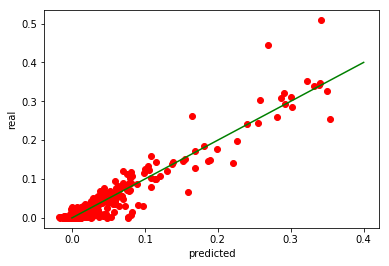

In [102]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [103]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [104]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f'  %rmse_train)
print('RMSE on 10-fold CV: %.4f'  %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.0168
RMSE on 10-fold CV: 0.0186


## Ridge Regression

In [105]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
# Compute RMSE on training data
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.0188
RMSE on 10-fold CV: 0.0201


### We can try different values of alpha and observe the impact on x-validation RMSE

In [107]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.0168		 0.0183
0.418	 0.0186		 0.0199
0.826	 0.0194		 0.0210
1.234	 0.0201		 0.0220
1.642	 0.0207		 0.0229
2.050	 0.0213		 0.0237
2.458	 0.0219		 0.0245
2.866	 0.0225		 0.0252
3.274	 0.0230		 0.0258
3.682	 0.0235		 0.0264
4.090	 0.0240		 0.0270
4.498	 0.0245		 0.0275
4.906	 0.0249		 0.0280
5.313	 0.0253		 0.0285
5.721	 0.0257		 0.0289
6.129	 0.0261		 0.0293
6.537	 0.0265		 0.0297
6.945	 0.0269		 0.0301
7.353	 0.0272		 0.0304
7.761	 0.0275		 0.0308
8.169	 0.0278		 0.0311
8.577	 0.0281		 0.0314
8.985	 0.0284		 0.0317
9.393	 0.0287		 0.0320
9.801	 0.0290		 0.0322
10.209	 0.0292		 0.0325
10.617	 0.0295		 0.0327
11.025	 0.0297		 0.0330
11.433	 0.0300		 0.0332
11.841	 0.0302		 0.0335
12.249	 0.0304		 0.0337
12.657	 0.0307		 0.0339
13.065	 0.0309		 0.0341
13.473	 0.0311		 0.0343
13.881	 0.0313		 0.0345
14.289	 0.0315		 0.0347
14.697	 0.0317		 0.0349
15.104	 0.0319		 0.0351
15.512	 0.0321		 0.0353
15.920	 0.0322		 0.0355
16.328	 0.0324		 0

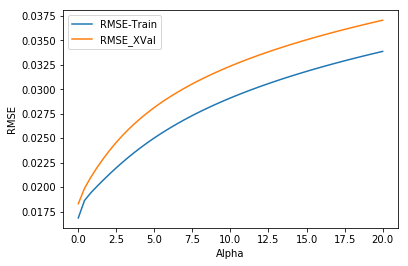

In [108]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

### To make comparisons across methods easier, let's parametrize the regression methods:

In [110]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))
        
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        met.fit(x_train, y_train)
        p = met.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print("\n")

Method: linear regression
RMSE on training: 0.0168
RMSE on 10-fold CV: 0.0186


Method: lasso
RMSE on training: 0.0569
RMSE on 10-fold CV: 0.0578


Method: ridge
RMSE on training: 0.0183
RMSE on 10-fold CV: 0.0195


Method: elastic-net
RMSE on training: 0.0569
RMSE on 10-fold CV: 0.0578


